# Chess.com Games Played Data Analysis

Data Analysis and Data Visualization of your chess games on Chess.com

NOTE: To use, first run chess.com_exporter.ipynb to download and your games played data.

-----

In [1]:
my_user = "markwk"

## Dependencies

In [2]:
from datetime import date, datetime as dt, timedelta as td
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

----

## Simple Data Check and Data Analysis

In [3]:
games = pd.read_csv("data/" + my_user + "_games_played_detailed.csv")

In [4]:
games.columns

Index(['end_time', 'fen', 'pgn', 'rated', 'rules', 'time_class',
       'time_control', 'url', 'black_id', 'black_rating', 'black_result',
       'black_username', 'white_id', 'white_rating', 'white_result',
       'white_username', 'my_side', 'my_result', 'termination', 'total_moves',
       'start_time', 'pgn_end_time', 'moves_times_white', 'moves_times_black'],
      dtype='object')

In [5]:
print('{:,} total games played'.format(len(games)))

74 total games played


In [6]:
# date additions
games['end_time'] = pd.to_datetime(games['end_time'])
games['date'] = games['end_time'].apply(lambda x: x.strftime('%Y-%m-%d')) # note: not very efficient
games['year'] = games['end_time'].dt.year
games['month'] = games['end_time'].dt.month
games['mnth_yr'] = games['end_time'].apply(lambda x: x.strftime('%Y-%m')) # note: not very efficient
games['day'] = games['end_time'].dt.day
games['dow'] = games['end_time'].dt.weekday
games['hour'] = games['end_time'].dt.hour

In [7]:
games.tail()

,end_time,fen,pgn,rated,rules,time_class,time_control,url,black_id,black_rating,...,pgn_end_time,moves_times_white,moves_times_black,date,year,month,mnth_yr,day,dow,hour
69,2018-09-14 12:22:37,1k1q4/p7/1pQ4p/8/2B5/N1P5/PP3PPN/4R1K1 b - -,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",True,chess,blitz,600,https://www.chess.com/live/game/3074572090,https://api.chess.com/pub/player/markwk,982,...,2018-09-14 12:22:37,"0:09:59.9, 0:09:50.8, 0:09:49.3, 0:09:43.8, 0:...","0:09:59, 0:09:53.8, 0:09:40, 0:09:04.8, 0:08:4...",2018-09-14,2018,9,2018-09,14,4,12
70,2018-09-14 13:06:03,R7/8/5k2/p7/1p6/1P6/P4K2/8 b - -,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",True,chess,blitz,600,https://www.chess.com/live/game/3074644572,https://api.chess.com/pub/player/markwk,973,...,2018-09-14 13:06:03,"0:09:59.9, 0:09:58, 0:09:56.7, 0:09:55.1, 0:09...","0:09:56.1, 0:09:48.5, 0:09:42, 0:09:36.2, 0:09...",2018-09-14,2018,9,2018-09,14,4,13
71,2018-09-15 12:44:53,r4rk1/ppb1n1p1/2p1p2p/3pn3/1P3PP1/P1NBB1qP/2P2...,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",True,chess,blitz,600,https://www.chess.com/live/game/3076863036,https://api.chess.com/pub/player/aguchi13,925,...,2018-09-15 12:44:53,"0:09:59.9, 0:09:58.2, 0:09:55.1, 0:09:41.8, 0:...","0:09:57.7, 0:09:55.8, 0:09:53.4, 0:09:50.9, 0:...",2018-09-15,2018,9,2018-09,15,5,12
72,2018-09-15 13:10:55,8/1ppb4/8/1p4p1/1kR5/6P1/Q4P1P/6K1 b - -,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",True,chess,blitz,600,https://www.chess.com/live/game/3076901697,https://api.chess.com/pub/player/markwk,973,...,2018-09-15 13:10:55,"0:09:59.9, 0:09:54.3, 0:09:28.2, 0:09:24, 0:09...","0:09:58.2, 0:09:49.9, 0:09:14, 0:09:10.3, 0:09...",2018-09-15,2018,9,2018-09,15,5,13
73,2018-09-16 03:04:11,8/pb4k1/4p3/1pp4p/7q/3P4/PP6/3K1R2 w - -,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",True,chess,blitz,600,https://www.chess.com/live/game/3078329073,https://api.chess.com/pub/player/markwk,980,...,2018-09-16 03:04:11,"0:09:58.1, 0:09:56.5, 0:09:52.6, 0:09:46.9, 0:...","0:09:58, 0:09:56.1, 0:09:39.7, 0:09:28, 0:09:2...",2018-09-16,2018,9,2018-09,16,6,3


----

## Monthly Analysis

In [8]:
month_counts = games['mnth_yr'].value_counts().sort_index()
month_counts.columns = ['Count']
month_counts.tail()

2018-09    74
Name: mnth_yr, dtype: int64

In [9]:
# not every month necessarily has a game, so fill in missing months with zero counts
#date_range = pd.date_range(start=min(highlights_10['timestamp']), end=max(highlights_10['timestamp']))
#months_range = date_range.map(lambda x: str(x.date())[:-3])
#index = np.unique(months_range)
# month_counts = month_counts.reindex(index, fill_value=0)

In [10]:
# total months
len(month_counts)

1

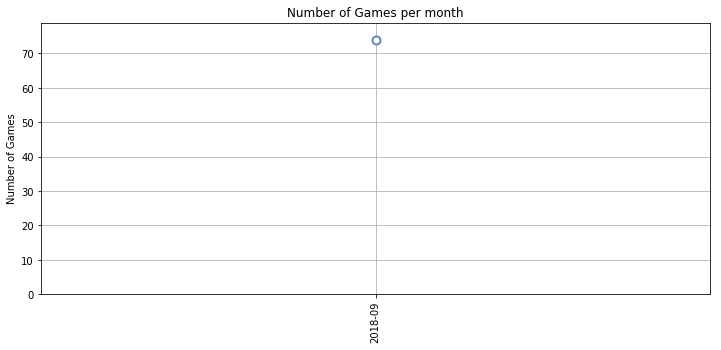

In [11]:
# a bit of a hackish solution, could use improvement
dataset = month_counts.tail(20)
chart_title = 'Number of Games per month'

max = np.max(np.array(month_counts)) + 5
n_groups = len(dataset)
index = np.arange(n_groups)

ax = dataset.plot(kind='line', figsize=[12, 5], linewidth=4, alpha=1, marker='o', color='#6684c1', 
                      markeredgecolor='#6684c1', markerfacecolor='w', markersize=8, markeredgewidth=2)

# ax.set_xlim((year_counts.index[0], year_counts.index[-1]))

ax.yaxis.grid(True)
ax.xaxis.grid(True)
ax.set_ylim(0, max)
ax.set_xticks(index)
ax.set_ylabel('Number of Games')
# ax.set_xlabel('')
plt.xticks(index, dataset.index, rotation=90)
ax.set_title(chart_title)

plt.show()

-----

## Games Per Day

In [12]:
daily_counts = games['date'].value_counts().sort_index()
daily_counts.columns = ['Count']

In [13]:
# daily_counts.tail(10)

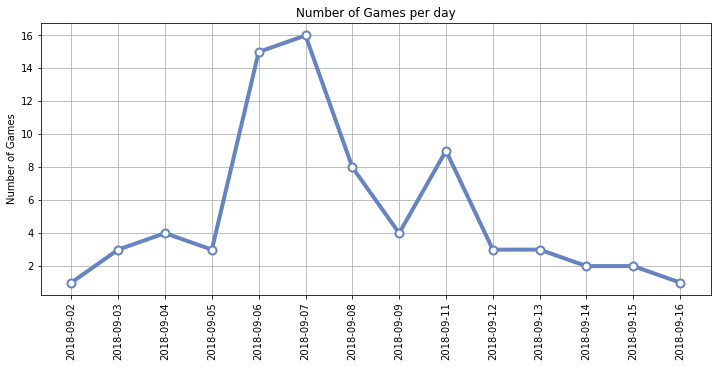

In [14]:
# a bit of a hackish solution, could use improvement
dataset = daily_counts.tail(30)
chart_title = 'Number of Games per day'

max = np.max(np.array(dataset)) + 5
n_groups = len(dataset)
index = np.arange(n_groups)

ax = dataset.plot(kind='line', figsize=[12, 5], linewidth=4, alpha=1, marker='o', color='#6684c1', 
                      markeredgecolor='#6684c1', markerfacecolor='w', markersize=8, markeredgewidth=2)

# ax.set_xlim((year_counts.index[0], year_counts.index[-1]))

ax.yaxis.grid(True)
ax.xaxis.grid(True)
# ax.set_ylim(0, 1000)
ax.set_xticks(index)
ax.set_ylabel('Number of Games')
# ax.set_xlabel('')
plt.xticks(index, dataset.index, rotation=90)
ax.set_title(chart_title)

plt.show()

In [15]:
daily_counts.to_csv("data/" + my_user + "_daily_games_count.csv")